In [1]:
import numpy as np
import uproot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import os

In [2]:
def generate_data(folder,filename,x_position,y_position,z_position,counts):
    x,y,z = np.array(filename.split('_')[2:5]).astype(float)
    x_position.append(x)
    y_position.append(y)
    z_position.append(z)
    file = uproot.open(folder + filename)
    events = file['Hits']
    energy = events.array("m_energy")
    counts.append(len(energy))
    
folder = 'polishedair/'
filename = 'opticalphoton_3eV_0.75_-0.25_-0.75_LUT_polishedair.root'
x,y,z = np.array(filename.split('_')[2:5]).astype(float)
file = uproot.open(folder + filename)
events = file['Hits']
energy = events.array("m_energy")
len(energy)

9485

In [40]:
folder = '/Users/suannchong/Documents/results/opticalphoton_positions/groundair1/'
directory = os.fsencode(folder)

x_position = []
y_position = []
z_position = []
counts = []

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".root"):
        generate_data(folder,filename,x_position,y_position,z_position,counts)
#         print(filename)
    else:
        continue
        
data = {'x':x_position, 'y':y_position, 'z':z_position, 'counts':counts}
df = pd.DataFrame(data).sort_values(by=['x', 'y', 'z'])

In [41]:
df

,x,y,z,counts
100,-0.75,-0.75,-0.75,9456
283,-0.75,-0.75,-0.50,9495
148,-0.75,-0.75,-0.25,9497
290,-0.75,-0.75,0.00,9471
291,-0.75,-0.75,0.25,9507
...,...,...,...,...
298,0.75,0.75,-0.25,9473
244,0.75,0.75,0.00,9500
104,0.75,0.75,0.25,9468
201,0.75,0.75,0.50,9479


Text(0, 0.5, 'Frequency')

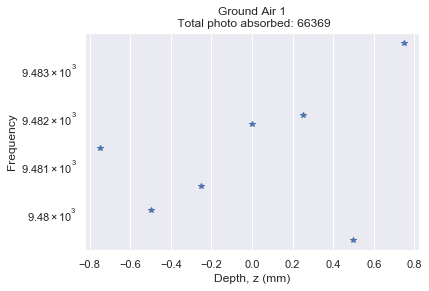

In [35]:
c = df.groupby(['z']).mean()['counts']
total = sum(c)
plt.semilogy(c, '*')
plt.title('Ground Air 1\n Total photo absorbed: %d' %total)
plt.xlabel('Depth, z (mm)')
plt.ylabel('Frequency')

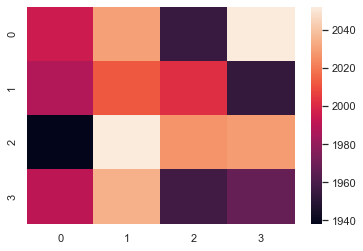

In [40]:
data = np.array([[1995,2030,1955,2052],[1988,2012,2002,1954],[1938,2052,2027,2029],[1991,2035,1958,1968]])
sns.heatmap(data)

In [12]:
layer1 = df[df['z'] == -0.75]
layer2 = df[df['z'] == -0.25]
layer3 = df[df['z'] == 0.25]
layer4 = df[df['z'] == 0.75]

In [26]:
x = layer1['x']
y = layer1['y']
c = layer1['counts']
layer1[layer1['x'] == -0.25].sort_values(by=['y'])

,x,y,z,counts
14,-0.25,-0.75,-0.75,2109
9,-0.25,-0.25,-0.75,1966
56,-0.25,0.25,-0.75,1962
61,-0.25,0.75,-0.75,2003


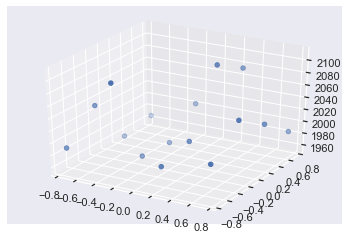

In [15]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,c)

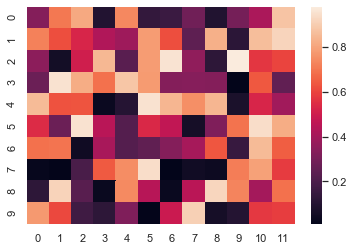

In [17]:
uniform_data = np.random.rand(10,12)
sns.heatmap(uniform_data)

In [36]:
69964/70000

0.9994857142857143

In [37]:
69586/70000

0.9940857142857142